In [0]:
import pandas as ps

In [0]:
df = ps.DataFrame(columns=["a", "b"])

In [0]:
df["a"] = ["Apple", "Banana", "Cheery"]
df["b"] = [100, 123, 76]

In [0]:
df

,a,b
0,Apple,100
1,Banana,123
2,Cheery,76


In [0]:
df.columns

Index(['a', 'b'], dtype='object')

In [0]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [0]:
df.index = ["01", "02", "03"]

In [0]:
df

,a,b
01,Apple,100
02,Banana,123
03,Cheery,76


In [0]:
df.index

Index(['01', '02', '03'], dtype='object')

In [0]:
df.columns

Index(['a', 'b'], dtype='object')

In [0]:
df.index = ["a", "b", "c"]

In [0]:
df

,a,b
a,Apple,100
b,Banana,123
c,Cheery,76


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
df= pd.read_csv("adult.csv")
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATIONNUM,MARITALSTATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [17]:
df.ABOVE50K.value_counts()

0    24720
1     7841
Name: ABOVE50K, dtype: int64

In [18]:
df.columns

Index(['AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION', 'EDUCATIONNUM',
       'MARITALSTATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX',
       'CAPITALGAIN', 'CAPITALLOSS', 'HOURSPERWEEK', 'NATIVECOUNTRY',
       'ABOVE50K'],
      dtype='object')

In [19]:
df.index

RangeIndex(start=0, stop=32561, step=1)

In [20]:
df.isna().sum()

AGE              0
WORKCLASS        0
FNLWGT           0
EDUCATION        0
EDUCATIONNUM     0
MARITALSTATUS    0
OCCUPATION       0
RELATIONSHIP     0
RACE             0
SEX              0
CAPITALGAIN      0
CAPITALLOSS      0
HOURSPERWEEK     0
NATIVECOUNTRY    0
ABOVE50K         0
dtype: int64

In [22]:
df.isnull().sum()

AGE              0
WORKCLASS        0
FNLWGT           0
EDUCATION        0
EDUCATIONNUM     0
MARITALSTATUS    0
OCCUPATION       0
RELATIONSHIP     0
RACE             0
SEX              0
CAPITALGAIN      0
CAPITALLOSS      0
HOURSPERWEEK     0
NATIVECOUNTRY    0
ABOVE50K         0
dtype: int64

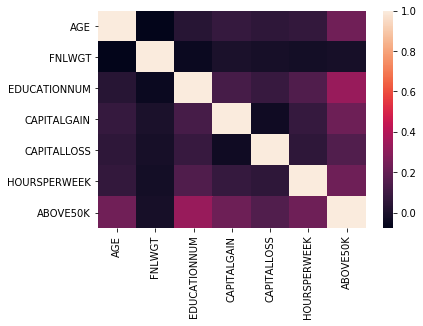

In [25]:
sns.heatmap(df.corr())

In [26]:
df.corr()

,AGE,FNLWGT,EDUCATIONNUM,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,ABOVE50K
AGE,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
FNLWGT,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
EDUCATIONNUM,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
CAPITALGAIN,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
CAPITALLOSS,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
HOURSPERWEEK,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
ABOVE50K,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


In [0]:
df2=pd.DataFrame(columns=["Col1"])
df2["Col1"]=["A","B","C","B","A","C","C","A","B","D"]

In [33]:
pd.get_dummies(df2)

,Col1_A,Col1_B,Col1_C,Col1_D
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0
5,0,0,1,0
6,0,0,1,0
7,1,0,0,0
8,0,1,0,0
9,0,0,0,1


In [35]:
pd.get_dummies(df)

,AGE,FNLWGT,EDUCATIONNUM,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,ABOVE50K,WORKCLASS_ ?,WORKCLASS_ Federal-gov,WORKCLASS_ Local-gov,WORKCLASS_ Never-worked,WORKCLASS_ Private,WORKCLASS_ Self-emp-inc,WORKCLASS_ Self-emp-not-inc,WORKCLASS_ State-gov,WORKCLASS_ Without-pay,EDUCATION_ 10th,EDUCATION_ 11th,EDUCATION_ 12th,EDUCATION_ 1st-4th,EDUCATION_ 5th-6th,EDUCATION_ 7th-8th,EDUCATION_ 9th,EDUCATION_ Assoc-acdm,EDUCATION_ Assoc-voc,EDUCATION_ Bachelors,EDUCATION_ Doctorate,EDUCATION_ HS-grad,EDUCATION_ Masters,EDUCATION_ Preschool,EDUCATION_ Prof-school,EDUCATION_ Some-college,MARITALSTATUS_ Divorced,MARITALSTATUS_ Married-AF-spouse,MARITALSTATUS_ Married-civ-spouse,MARITALSTATUS_ Married-spouse-absent,MARITALSTATUS_ Never-married,MARITALSTATUS_ Separated,MARITALSTATUS_ Widowed,OCCUPATION_ ?,...,NATIVECOUNTRY_ Canada,NATIVECOUNTRY_ China,NATIVECOUNTRY_ Columbia,NATIVECOUNTRY_ Cuba,NATIVECOUNTRY_ Dominican-Republic,NATIVECOUNTRY_ Ecuador,NATIVECOUNTRY_ El-Salvador,NATIVECOUNTRY_ England,NATIVECOUNTRY_ France,NATIVECOUNTRY_ Germany,NATIVECOUNTRY_ Greece,NATIVECOUNTRY_ Guatemala,NATIVECOUNTRY_ Haiti,NATIVECOUNTRY_ Holand-Netherlands,NATIVECOUNTRY_ Honduras,NATIVECOUNTRY_ Hong,NATIVECOUNTRY_ Hungary,NATIVECOUNTRY_ India,NATIVECOUNTRY_ Iran,NATIVECOUNTRY_ Ireland,NATIVECOUNTRY_ Italy,NATIVECOUNTRY_ Jamaica,NATIVECOUNTRY_ Japan,NATIVECOUNTRY_ Laos,NATIVECOUNTRY_ Mexico,NATIVECOUNTRY_ Nicaragua,NATIVECOUNTRY_ Outlying-US(Guam-USVI-etc),NATIVECOUNTRY_ Peru,NATIVECOUNTRY_ Philippines,NATIVECOUNTRY_ Poland,NATIVECOUNTRY_ Portugal,NATIVECOUNTRY_ Puerto-Rico,NATIVECOUNTRY_ Scotland,NATIVECOUNTRY_ South,NATIVECOUNTRY_ Taiwan,NATIVECOUNTRY_ Thailand,NATIVECOUNTRY_ Trinadad&Tobago,NATIVECOUNTRY_ United-States,NATIVECOUNTRY_ Vietnam,NATIVECOUNTRY_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
df.EDUCATION.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [0]:
df3= pd.get_dummies(df)

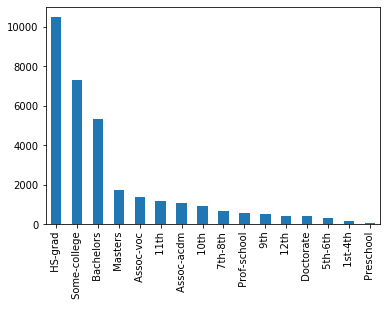

In [39]:
df.EDUCATION.value_counts().plot.bar()

In [0]:
dt=DecisionTreeClassifier()

In [44]:
dt.fit(df3.drop(columns=["ABOVE50K"]),df3[["ABOVE50K"]])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
dt.feature_importances_

array([1.11034275e-01, 1.83593226e-01, 1.14358299e-01, 1.05509565e-01,
       3.74548019e-02, 6.65680775e-02, 1.13582441e-03, 4.19267360e-03,
       5.20336863e-03, 0.00000000e+00, 9.31570819e-03, 4.81191791e-03,
       8.94185388e-03, 4.74736629e-03, 0.00000000e+00, 2.89187541e-04,
       4.63859282e-04, 4.15196302e-04, 2.71603134e-04, 2.97220115e-04,
       1.77397790e-04, 2.70232099e-04, 1.28479420e-03, 2.32381794e-03,
       1.87440521e-03, 3.74004316e-04, 1.64787715e-03, 2.67305979e-03,
       0.00000000e+00, 6.15949317e-04, 3.05568502e-03, 2.90195850e-03,
       3.60030403e-04, 1.97771282e-01, 3.38788182e-04, 1.30431364e-03,
       1.47522941e-03, 5.79144266e-04, 1.33657666e-03, 4.77771832e-03,
       0.00000000e+00, 8.29158489e-03, 9.16238606e-03, 2.55944770e-03,
       3.48571680e-03, 5.74402378e-03, 3.38238262e-03, 0.00000000e+00,
       7.70951369e-03, 3.79249548e-03, 8.71361308e-03, 4.61316403e-03,
       5.10871138e-03, 1.47450313e-03, 2.58260704e-03, 9.30853071e-04,
      

In [52]:
pd.DataFrame([df3.columns, dt.feature_importances_]).T

,0,1
0,AGE,0.111034
1,FNLWGT,0.183593
2,EDUCATIONNUM,0.114358
3,CAPITALGAIN,0.10551
4,CAPITALLOSS,0.0374548
...,...,...
104,NATIVECOUNTRY_ Thailand,0.000154307
105,NATIVECOUNTRY_ Trinadad&Tobago,0.0053314
106,NATIVECOUNTRY_ United-States,0.000311528
107,NATIVECOUNTRY_ Vietnam,0.000527219


In [48]:
pd.DataFrame(np.array([df3.columns, dt.feature_importances_]).T)

,0
0,"Index(['AGE', 'FNLWGT', 'EDUCATIONNUM', 'CAPIT..."
1,"[0.11103427508397204, 0.18359322612563356, 0.1..."


In [0]:
X = df3.drop(columns=["ABOVE50K"])

In [61]:
dt.predict(X.iloc[:10,:])

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [63]:
dt.predict_proba(X.iloc[:10,:])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [64]:
sklearn.__version__

'0.21.3'